In [1]:
# import torch
import torch
from torch import nn


#import torch Vision,
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


# visualization,
import matplotlib.pyplot as plt


print(f"pyTorch Version : {torch.__version__}")
print(f"Torchvision Version : {torchvision.__version__}")



pyTorch Version : 2.5.1+cu121
Torchvision Version : 0.20.1+cu121


In [2]:
train_data = datasets.FashionMNIST(root= "data",
                                   train=True,
                                   transform=ToTensor(),
                                   download = True)


test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  transform=ToTensor(),
                                  download=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 212kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.87MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.01MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image,label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Visualization data

In [7]:
image.shape

torch.Size([1, 28, 28])

Image Shape : torch.Size([1, 28, 28])


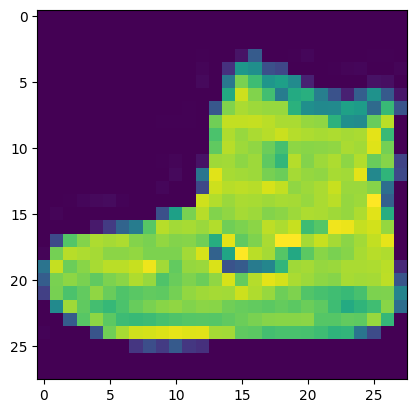

Text(0.5, 1.0, '9')

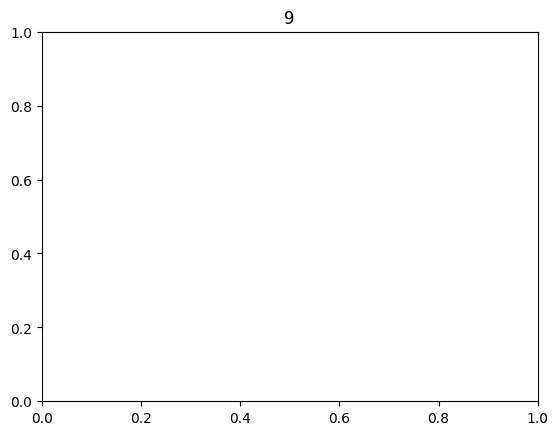

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.show()
plt.title(label)

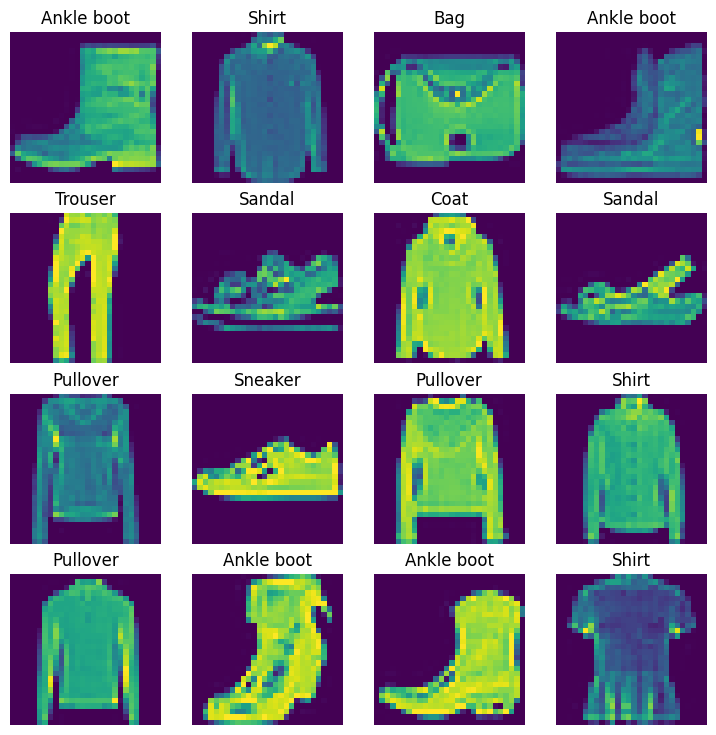

In [9]:
# plot More images,
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4

for i in range(1,rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze())
  plt.title(class_name[label])
  plt.axis(False);


# Data-Loader


In [10]:
from torch.utils.data import DataLoader

Batch_size=32

train_dataLoader = DataLoader(train_data,
                              batch_size=Batch_size,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=Batch_size,
                             shuffle=True)


In [11]:
print(f"Train_Data Loader : {train_dataLoader}")
print(f"Test_Data Loader : {test_dataloader}")

# Data_Loader_Size : total Size of Data/BatchSize
print(f"Train_Data Loader Size : {len(train_dataLoader)} batch size of {Batch_size}")
print(f"Test_Data Loader Size : {len(test_dataloader)} batch size of {Batch_size}")


Train_Data Loader : <torch.utils.data.dataloader.DataLoader object at 0x7c9780204940>
Test_Data Loader : <torch.utils.data.dataloader.DataLoader object at 0x7c9780205360>
Train_Data Loader Size : 1875 batch size of 32
Test_Data Loader Size : 313 batch size of 32


In [12]:
train_feature_batch, train_feature_label = next(iter(train_dataLoader))

train_feature_batch.shape, train_feature_label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


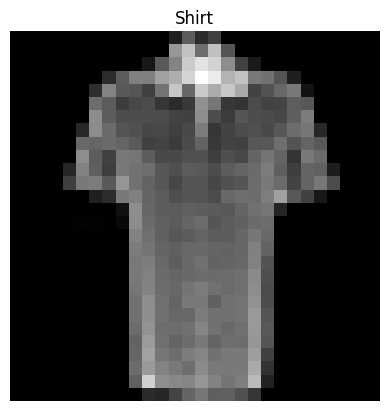

In [13]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_feature_label[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# Model_0: Build a baseline model

In [14]:
flatten_model = nn.Flatten()

x = train_feature_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")



Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [15]:
import torch.nn as nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int, hidden_units:int, output_shape:int ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,
    hidden_units=10,
    output_shape=len(class_name)
)

## Setup loss, optimizer and evaluation metrics

In [17]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exits")
else:
  print("File Downloaded helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


File Downloaded helper_functions.py


In [18]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## Creating a function to time our experiments

In [19]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end-start
  print(f"Train time on : {device}: toal time : {total_time:.3f} seconds")

## Make predictions and get Model 0 results

In [20]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model acc": acc}


model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

model_0_results



{'model_name': 'FashionMNISTModelV0',
 'model_loss': 2.318990707397461,
 'model acc': 10.86261980830671}

In [21]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

# 6. Model 1: Building a better model with non-linearity

In [22]:
class FashionMNISTModelV1(torch.nn.Module):
  def __init__(self, input_shape:int, hidden_shape:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_shape),
        nn.ReLU(),
        nn.Linear(in_features=hidden_shape, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x);

In [23]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784, hidden_shape=10, output_shape=len(class_name)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

## Functionizing training and test loops

In [25]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [26]:
torch.manual_seed(42)
from tqdm.auto import tqdm


# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataLoader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95690 | Test accuracy: 64.98%

Epoch: 1
---------
Train loss: 0.73779 | Train accuracy: 73.69%
Test loss: 0.72388 | Test accuracy: 74.21%

Epoch: 2
---------
Train loss: 0.66776 | Train accuracy: 76.08%
Test loss: 0.68751 | Test accuracy: 75.64%

Train time on : cuda: toal time : 32.762 seconds


## 7. Model 2: Building a Convolutional Neural Network (CNN)

In [27]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int, hidden_units:int, output_shape:int):
     super().__init__()
     self.block_1 = nn.Sequential(
                nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
                nn.ReLU(),

                nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)
         )

     self.block_2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
         nn.ReLU(),

         nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2)
     )


     self.Classifier = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=hidden_units, out_features=output_shape, bias=True, device=None, dtype=None)
     )

     def forward(self,x:torch.Tensor):
      x = self.block_1(x)
      x = self.block_2(x)
      x = self.Classifier(x)
      return x


torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_name)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [28]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

images.shape,images, test_image.shape, test_image

(torch.Size([32, 3, 64, 64]),
 tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
           [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
           [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
           ...,
           [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
           [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
           [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],
 
          [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
           [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
           [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
           ...,
           [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
           [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
           [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],
 
          [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0

In [29]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

## 7.2 Stepping through nn.MaxPool2d()

In [30]:
# create some some toy data ,

torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"images shape : {images.shape}")
print(f"test_image shape : {test_image.shape}")
print(f"images : {images}")

images shape : torch.Size([32, 3, 64, 64])
test_image shape : torch.Size([3, 64, 64])
images : tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
          [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
          [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
          ...,
          [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
          [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
          [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

         [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
          [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
          [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
          ...,
          [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
          [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
          [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

       

In [31]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [32]:
test_image.unsqueeze(dim=0).shape, test_image.shape

(torch.Size([1, 3, 64, 64]), torch.Size([3, 64, 64]))

In [33]:
conv_layer(test_image).unsqueeze(dim=0).shape, conv_layer(test_image).shape

(torch.Size([1, 10, 62, 62]), torch.Size([10, 62, 62]))